In [97]:
from dataclasses import dataclass
from icecream import ic
import matplotlib.pyplot as plt
import copy
import numpy as np
import pandas as pd

In [98]:
@dataclass
class Request:
  id: int
  receipt_time: int
  process_time: int
  waiting_time: int = 0
  ticks_in_pocessor: int = 0

In [99]:
# Входные данные

requests = [
    Request(1, 0, 4),
    Request(2, 2, 4),
    Request(3, 6, 2),
    Request(4, 10, 4),
    Request(5, 18, 8),
    Request(6, 22, 2),
    Request(7, 32, 8),
    Request(8, 34, 2),
    Request(9, 44, 4),
    Request(10, 48, 0),
]                               # заявки
life_time = 60                  # общее время рассматриваемого интервала
requests_count = len(requests)  # общее количество заявок

In [100]:
input_time = life_time / requests_count                     # среднее время между заявками
λ = 1 / input_time                                          # интенсивность входного потока
all_process_time = sum(r.process_time for r in requests)    # общее время обработки заявок
avg_process_time = all_process_time / requests_count            # среднее время обработки одной заявки
μ = 1 / avg_process_time                                    # интенсивность обслуживания

print('Среднее время между заявками', input_time, sep=' = ')
print('Интенсивность входного потока', λ, sep=' = ')
print('Общее время обработки заявок', all_process_time, sep=' = ')
print('Среднее время обработки одной заявки', avg_process_time, sep=' = ')
print('Интенсивность обслуживания', μ, sep=' = ')

Среднее время между заявками = 6.0
Интенсивность входного потока = 0.16666666666666666
Общее время обработки заявок = 38
Среднее время обработки одной заявки = 3.8
Интенсивность обслуживания = 0.2631578947368421


In [101]:
# Симуляция процесса

def run(requests):
  queue_snapshots = []
  queue = []
  working_time = 0

  for t in range (0, life_time + 1):
    if (len(queue) != 0):
      queue[0].ticks_in_pocessor += 1
      if queue[0].process_time == queue[0].ticks_in_pocessor:
        queue.remove(queue[0])
    request = next((x for x in requests if x.receipt_time == t), None)
    if request is not None:
      queue.append(request)
    for i in range (1, len(queue)):
      queue[i].waiting_time += 1
    if (len(queue) != 0):
      working_time += 1
    queue_snapshots.append(copy.deepcopy(queue))

  free_time = life_time - working_time
  ρ = working_time / life_time

  return free_time, ρ, queue_snapshots, working_time

In [102]:
# Диаграммап симуляции и результат симуляции

def show_diagram(queue_snapshots):
  plt.title('Диаграмма работы системы (нахождения заявок в системе)')
  plt.xlabel('Время')
  plt.ylabel('Номер заявки')
  plt.grid()
  plt.xticks(np.arange(0, life_time, 5))
  x_vals = []
  y_vals = []
  for i in range (len(queue_snapshots)):
    for j in range (len(queue_snapshots[i])):
      x_vals.append(queue_snapshots[i][j].receipt_time + queue_snapshots[i][j].ticks_in_pocessor + queue_snapshots[i][j].waiting_time)
      y_vals.append(queue_snapshots[i][j].id)
  plt.plot(x_vals, y_vals,'ro', markersize=2)
  plt.show()


def diagram_results(working_time, free_time, ρ):
  print('Суммарное время занятости системы', working_time, sep=' = ')
  print('Суммарное время простоя системы', free_time, sep=' = ')
  print('Загрузка системы', ρ, sep=' = ')

In [103]:
# Диаграмма очереди системы, характеристики очереди

def show_queue_diagram(queue_snapshots):
  plt.title('Диаграмма заявок, стоящих в очереди')
  plt.xlabel('Время')
  plt.ylabel('Номер заявки')
  plt.grid()
  plt.xticks(np.arange(0, life_time, 5))
  x_vals = []
  y_vals = []
  for i in range (len(queue_snapshots)):
    for j in range (1, len(queue_snapshots[i])):
      x_vals.append(queue_snapshots[i][j].receipt_time + queue_snapshots[i][j].ticks_in_pocessor + queue_snapshots[i][j].waiting_time)
      y_vals.append(queue_snapshots[i][j].id)
  plt.plot(x_vals, y_vals,'ro', markersize=2)
  plt.show()


def queue_diagram_results():
  waiting_time = sum(r.waiting_time for r in requests)
  avg_waiting_time = waiting_time / requests_count
  print('Суммарное время ожидания', waiting_time, sep=' = ')
  print('Среднее время ожидания', avg_waiting_time, sep=' = ')
  return avg_waiting_time


def being_results(queue_snapshots):
  being_time = sum(len(y) for y in queue_snapshots) / requests_count
  being_count = sum(len(y) for y in queue_snapshots) / life_time
  print('Время пребывания заявок в системе', being_time, sep=' = ')
  print('Среднее количество заявок в системе', being_count, sep=' = ')
  return being_count, being_time


def waiting_results(queue_snapshots):
  waiting_count = 0
  for i in range (len(queue_snapshots)):
    for j in range (1, len(queue_snapshots[i])):
      waiting_count += 1
  waiting_count /= life_time
  print('Среднее число заявок в очереди за единицу времени', waiting_count, sep=' = ')
  return waiting_count

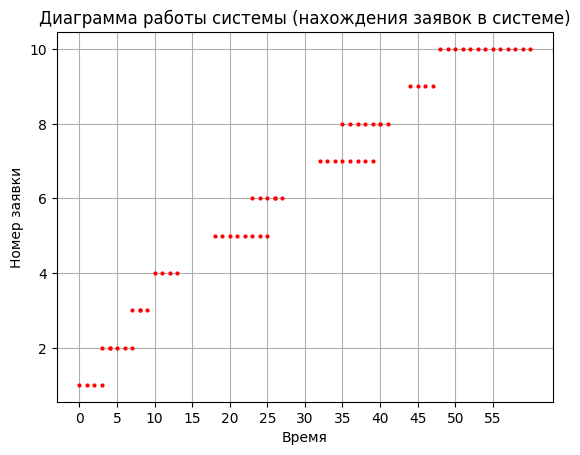

Суммарное время занятости системы = 51
Суммарное время простоя системы = 9
Загрузка системы = 0.85


In [104]:
# Интуитивный подход
free_time, ρ, queue_snapshots, working_time = run(requests)
show_diagram(queue_snapshots)
diagram_results(working_time, free_time, ρ)

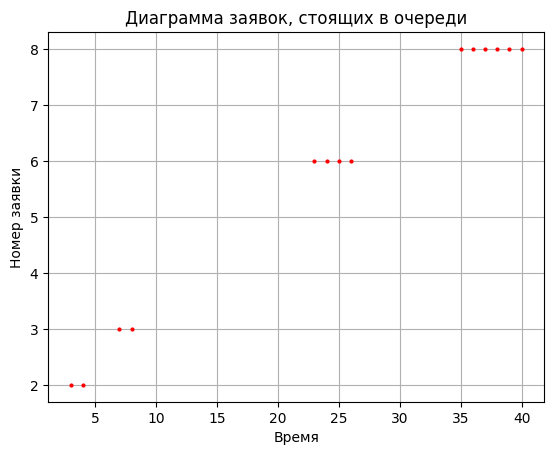

Суммарное время ожидания = 14
Среднее время ожидания = 1.4
Время пребывания заявок в системе = 6.5
Среднее количество заявок в системе = 1.0833333333333333
Среднее число заявок в очереди за единицу времени = 0.23333333333333334


In [105]:
show_queue_diagram(queue_snapshots)
avg_waiting_time = queue_diagram_results()
being_count, being_time = being_results(queue_snapshots)
waiting_count = waiting_results(queue_snapshots)

In [106]:
intuitive = [input_time, avg_process_time, ρ, waiting_count, avg_waiting_time, being_count, being_time]

In [107]:
# Теоретический подсчет

ρ = λ / μ
avg_waiting_time = avg_process_time * ρ / (1 - ρ)
being_time = avg_process_time / (1 - ρ)
waiting_count = ρ ** 2 / (1 - ρ)
being_count = ρ / (1 - ρ)

print('Загрузка системы', ρ, sep=' = ')
print('Среднее время ожидания', avg_waiting_time, sep=' = ')
print('Время пребывания заявок в системе', being_time, sep=' = ')
print('Среднее число заявок в очереди за единицу времени', waiting_count, sep=' = ')
print('Среднее количество заявок в системе', being_count, sep=' = ')

theoretical = [input_time, avg_process_time, ρ, waiting_count, avg_waiting_time, being_count, being_time]

Загрузка системы = 0.6333333333333333
Среднее время ожидания = 6.563636363636362
Время пребывания заявок в системе = 10.363636363636362
Среднее число заявок в очереди за единицу времени = 1.0939393939393938
Среднее количество заявок в системе = 1.727272727272727


In [108]:
# Детерминированный случай

requests = []
for i in range(10):
  requests.append(Request(i + 1, input_time * i, 4))

life_time = 60
requests_count = len(requests)

input_time = life_time / requests_count
λ = 1 / input_time
all_process_time = sum(r.process_time for r in requests)
avg_process_time = all_process_time / input_time
μ = 1 / avg_process_time

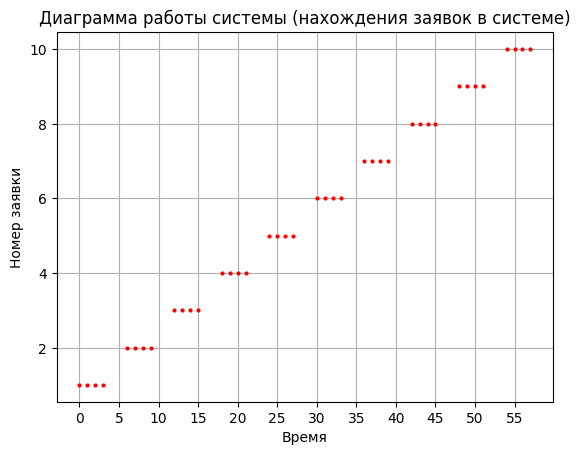

Суммарное время занятости системы = 40
Суммарное время простоя системы = 20
Загрузка системы = 0.6666666666666666


In [109]:
free_time, ρ, queue_snapshots, working_time = run(requests)
show_diagram(queue_snapshots)
diagram_results(working_time, free_time, ρ)

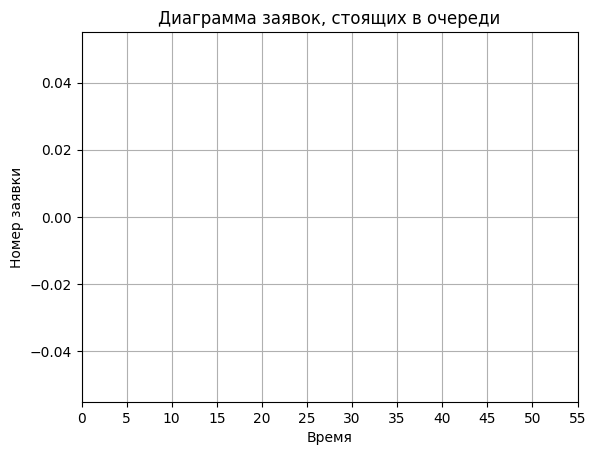

Суммарное время ожидания = 0
Среднее время ожидания = 0.0
Время пребывания заявок в системе = 4.0
Среднее количество заявок в системе = 0.6666666666666666
Среднее число заявок в очереди за единицу времени = 0.0


In [110]:
show_queue_diagram(queue_snapshots)
avg_waiting_time = queue_diagram_results()
being_count, being_time = being_results(queue_snapshots)
waiting_count = waiting_results(queue_snapshots)

In [111]:
determine = [input_time, avg_process_time, ρ, waiting_count, avg_waiting_time, being_count, being_time]

In [112]:
# сравнительная таблитца

data = {
    'Характеристики системы': ['Т_вх (мин)', 'Т_0 (мин)', 'ρ', 'N_w (заяв)', 'Т_w (мин)', 'N_s (заявки)', 'T_n (мин)'],
    'Интуитивный подход': intuitive,
    'Теор. подсчет.': theoretical,
    'Детермин. поток': determine
}

df = pd.DataFrame(data)
print(df)

  Характеристики системы  Интуитивный подход  Теор. подсчет.  Детермин. поток
0             Т_вх (мин)            6.000000        6.000000         6.000000
1              Т_0 (мин)            3.800000        3.800000         6.666667
2                      ρ            0.850000        0.633333         0.666667
3             N_w (заяв)            0.233333        1.093939         0.000000
4              Т_w (мин)            1.400000        6.563636         0.000000
5           N_s (заявки)            1.083333        1.727273         0.666667
6              T_n (мин)            6.500000       10.363636         4.000000
